In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import glob
import numpy as np
import tqdm

2023-07-30 17:11:43.550194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-30 17:11:43.668940: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-30 17:11:43.672978: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-30 17:11:43.672993: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [3]:
batch_size = 32
img_height = 128
img_width = 128

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "../../data/derived_data/data_augmented/",
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    validation_split=0.3,
    subset="training",
    image_size=(img_width, img_height),
    shuffle=True,
    seed=0,
)

Found 11456 files belonging to 716 classes.
Using 8020 files for training.


In [28]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    "../../data/derived_data/data_augmented/",
    labels="inferred",
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    validation_split=0.3,
    subset="validation",
    image_size=(img_width, img_height),
    shuffle=True,
    seed=0,
)

Found 11456 files belonging to 716 classes.
Using 3436 files for validation.


In [29]:
val_batches = tf.data.experimental.cardinality(val_ds)
val_batches

<tf.Tensor: shape=(), dtype=int64, numpy=108>

In [30]:
test_ds = val_ds.take(val_batches // 2)

In [31]:
val_ds = val_ds.skip(val_batches // 2)

In [33]:
tf.data.experimental.cardinality(test_ds)

<tf.Tensor: shape=(), dtype=int64, numpy=54>

In [34]:
class_names = train_ds.class_names

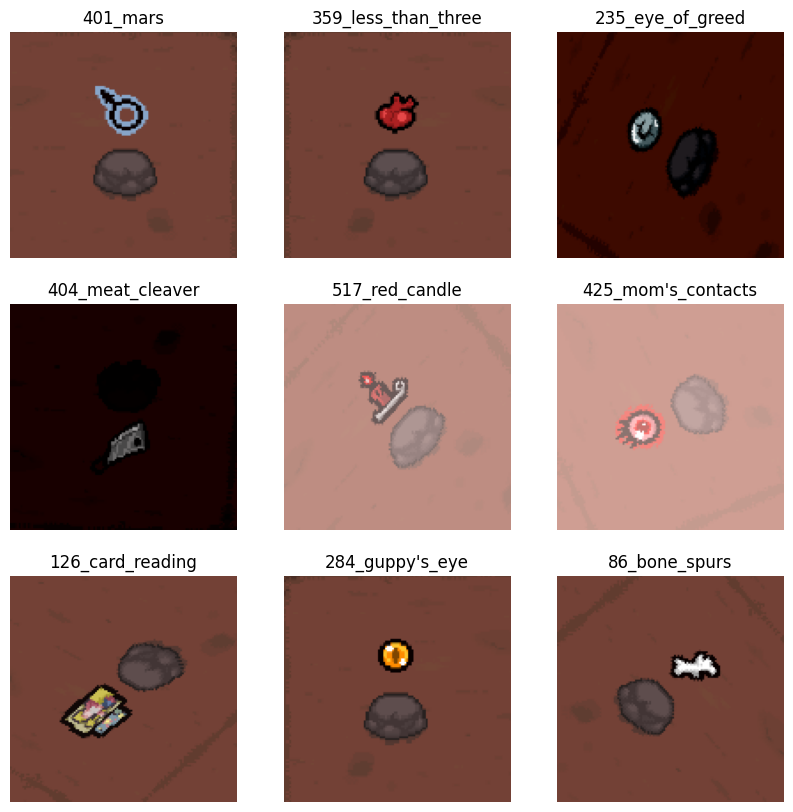

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [36]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [37]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10


251/251 [==============================] - 20s 67ms/step - loss: 6.5390 - accuracy: 0.0021 - val_loss: 6.4033 - val_accuracy: 0.0029
Epoch 2/10
251/251 [==============================] - 17s 69ms/step - loss: 5.8565 - accuracy: 0.0276 - val_loss: 5.0364 - val_accuracy: 0.0732
Epoch 3/10
251/251 [==============================] - 20s 79ms/step - loss: 3.7660 - accuracy: 0.2173 - val_loss: 3.4415 - val_accuracy: 0.2793
Epoch 4/10
251/251 [==============================] - 20s 80ms/step - loss: 2.2497 - accuracy: 0.4646 - val_loss: 2.8697 - val_accuracy: 0.4520
Epoch 5/10
251/251 [==============================] - 20s 80ms/step - loss: 1.4053 - accuracy: 0.6367 - val_loss: 2.7202 - val_accuracy: 0.5451
Epoch 6/10
251/251 [==============================] - 20s 81ms/step - loss: 0.9476 - accuracy: 0.7473 - val_loss: 2.9443 - val_accuracy: 0.5603
Epoch 7/10
251/251 [==============================] - 20s 79ms/step - loss: 0.6825 - accuracy: 0.8155 - val_loss: 3.1261 - val_accuracy: 0.5884
Epo

In [59]:
history.history

{'loss': [6.538968086242676,
  5.8565192222595215,
  3.765977144241333,
  2.2497096061706543,
  1.4052683115005493,
  0.9476039409637451,
  0.6825342774391174,
  0.45958083868026733,
  0.3408081829547882,
  0.2731679677963257],
 'accuracy': [0.0021197006572037935,
  0.02755611017346382,
  0.2173316776752472,
  0.4645885229110718,
  0.6366583704948425,
  0.747256875038147,
  0.8154613375663757,
  0.8699501156806946,
  0.9064837694168091,
  0.9209476113319397],
 'val_loss': [6.403339862823486,
  5.036388874053955,
  3.441478967666626,
  2.86969256401062,
  2.7201967239379883,
  2.944343328475952,
  3.1260986328125,
  3.167937994003296,
  3.7311460971832275,
  3.901273488998413],
 'val_accuracy': [0.002927400404587388,
  0.0731850117444992,
  0.27927401661872864,
  0.45199063420295715,
  0.5450819730758667,
  0.5603044629096985,
  0.5884075164794922,
  0.595433235168457,
  0.6071428656578064,
  0.6048009395599365]}

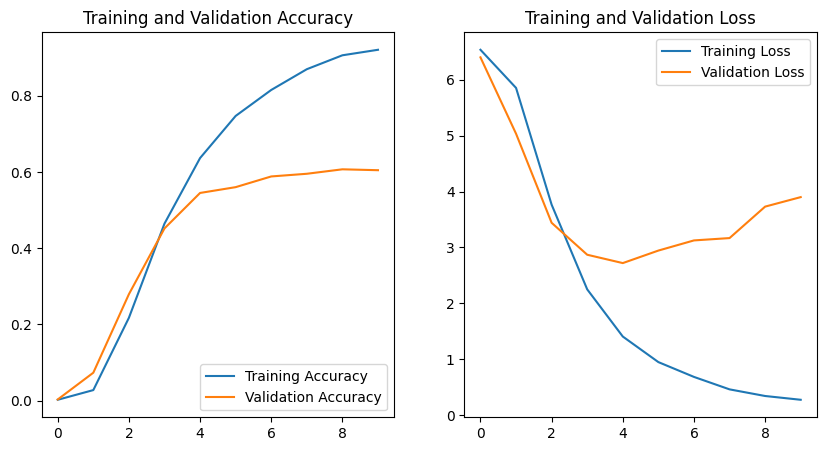

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [42]:
img = tf.keras.utils.load_img(
    "/home/mizunno/Projects/TBOI_item_detector/data/derived_data/data_augmented/652_the_mulligan/652_the_mulligan_5.png", target_size=(img_height, img_width)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 [==============================] - 0s 108ms/step
This image most likely belongs to 652_the_mulligan with a 99.97 percent confidence.


In [57]:
test_loss, test_acc = model.evaluate(test_ds)

54/54 [==============================] - 2s 27ms/step - loss: 3.5544 - accuracy: 0.6117
